Enter the number of employees: 7


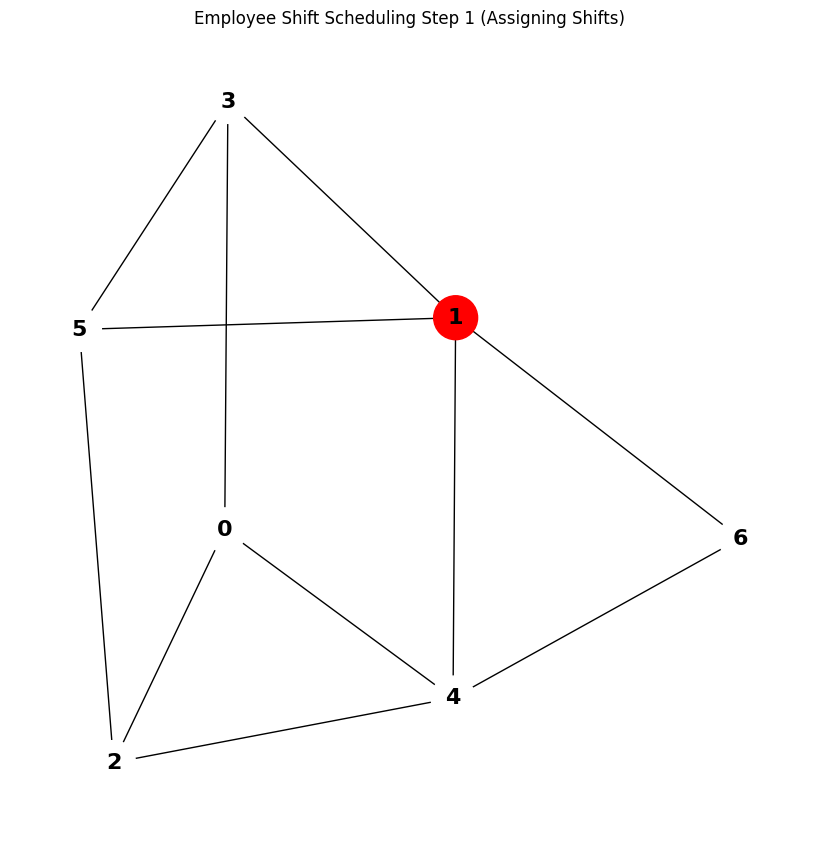

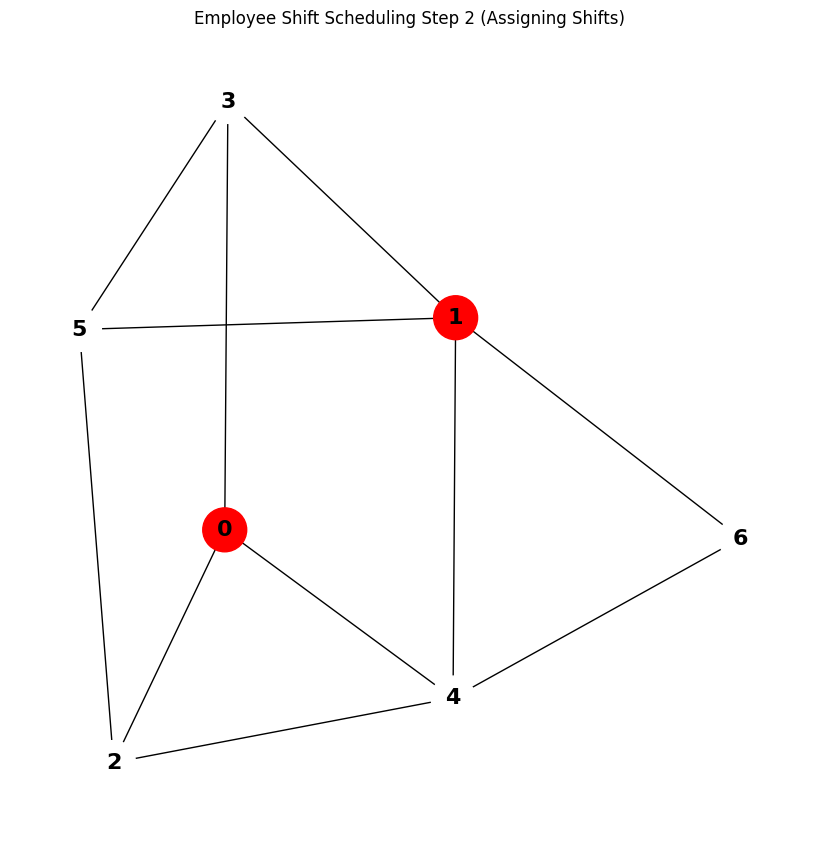

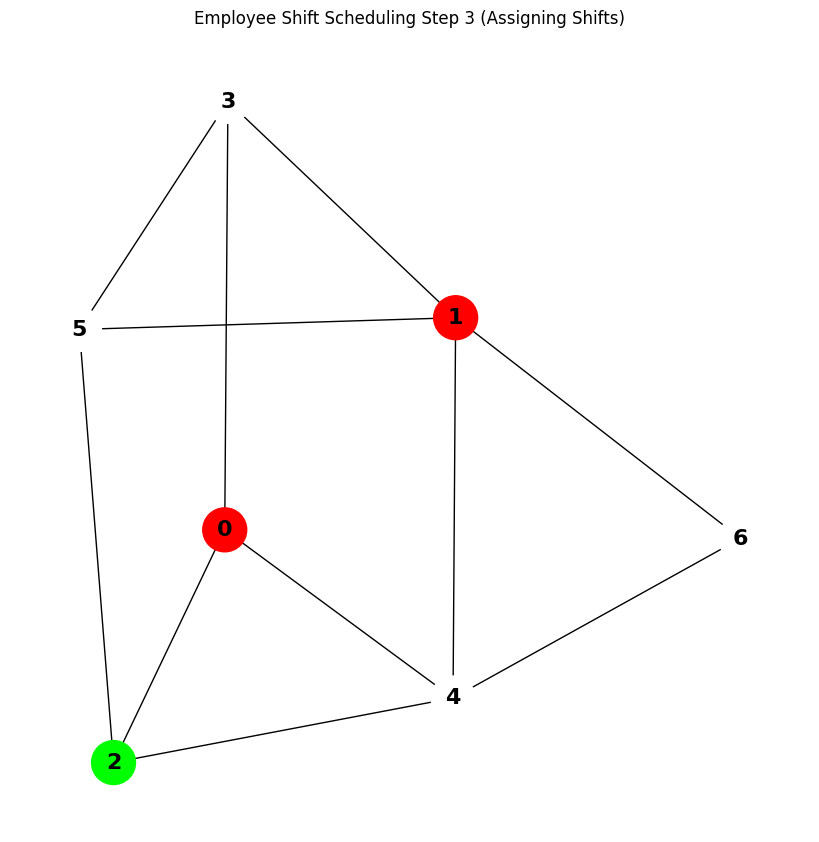

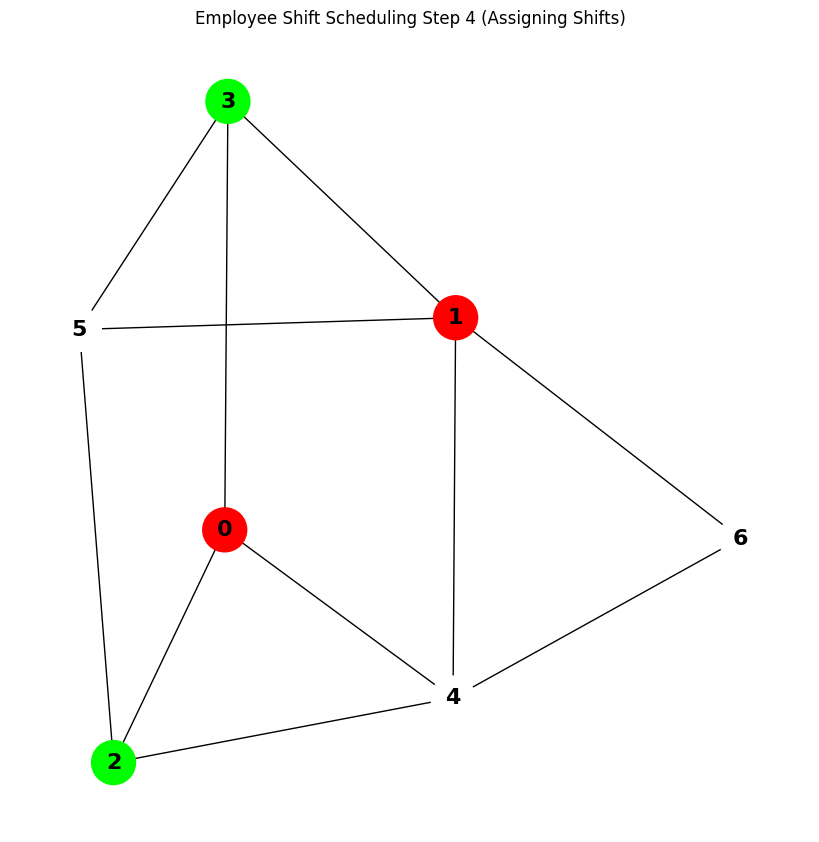

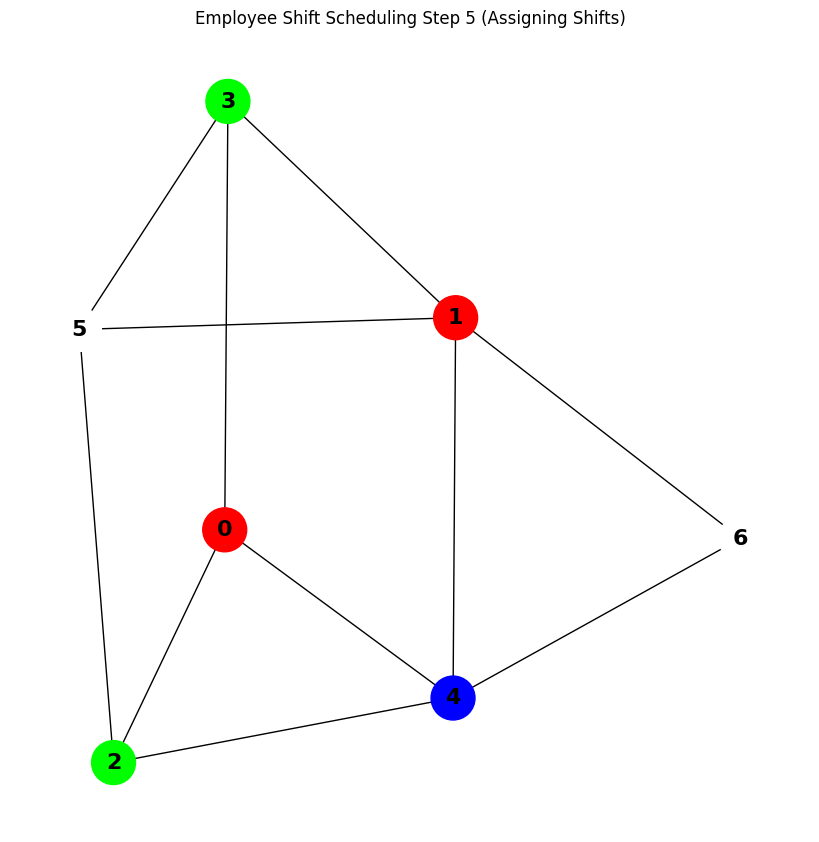

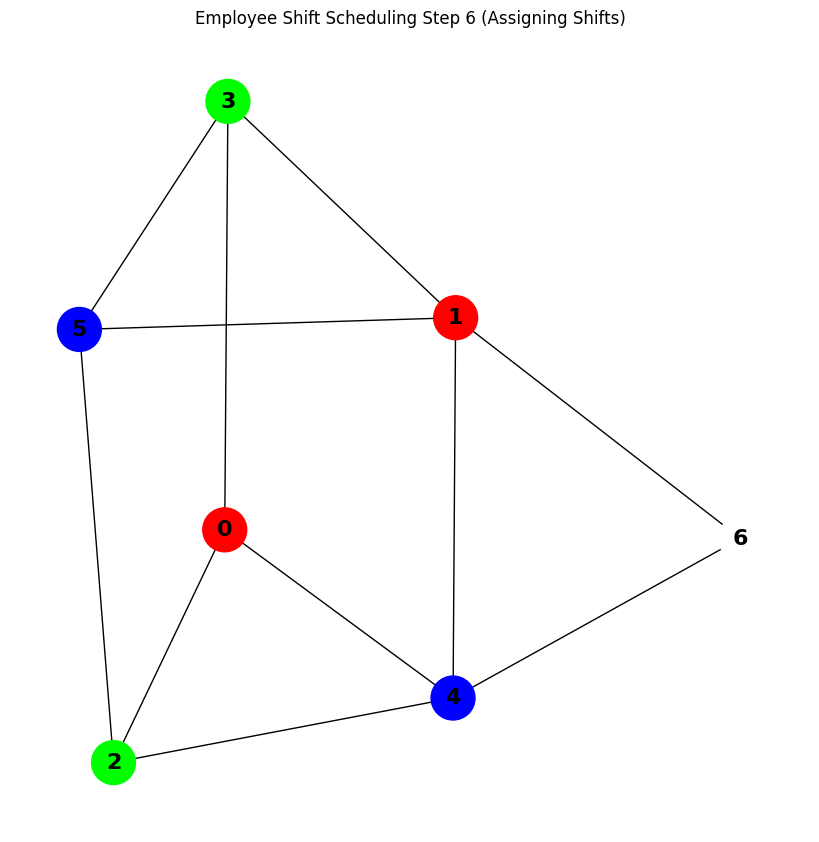

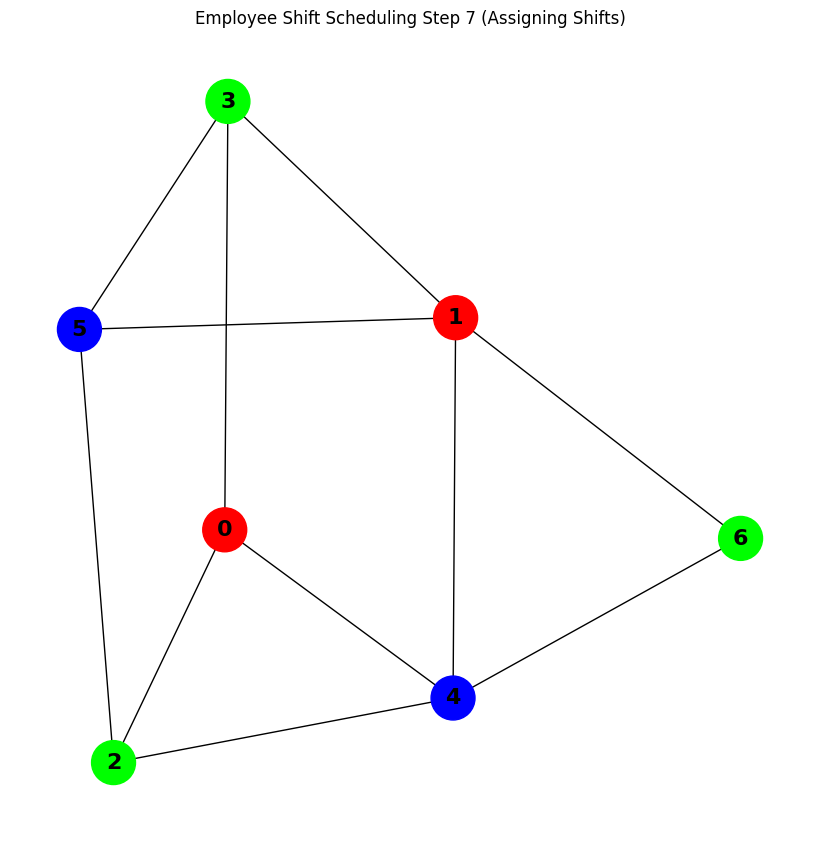

Final Assignment of Shifts for Employees: {1: '#FF0000', 0: '#FF0000', 2: '#00FF00', 3: '#00FF00', 4: '#0000FF', 5: '#0000FF', 6: '#00FF00'}


In [1]:
# Employee Shift Scheduling Scenario
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_colors_shifts(num_employees):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_employees, len(color_list))]

def create_shift_conflict_graph(num_employees):
    G = nx.gnp_random_graph(num_employees, 0.5, seed=42)
    return G

def visualize_shift_schedule(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))
    node_colors = ['#ffffff'] * len(G.nodes)
    for node, color in assignment.items():
        node_colors[node] = color
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', node_size=1000, font_size=16)
    plt.title(f"Employee Shift Scheduling Step {step} (Assigning Shifts)")
    plt.show()

def is_valid_shift_color(G, node, color, assignment):
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def select_unassigned_employee_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

def backtracking_shift_with_heuristics(G, assignment, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment
    node = select_unassigned_employee_Degree(G, assignment)
    for color in colors:
        if is_valid_shift_color(G, node, color, assignment):
            assignment[node] = color
            visualize_shift_schedule(G, assignment, step, pos)
            result = backtracking_shift_with_heuristics(G, assignment, step+1, colors, pos)
            if result:
                return result
            del assignment[node]
    return None

def schedule_shifts_with_user_input():
    num_employees = int(input("Enter the number of employees: "))
    colors = generate_colors_shifts(num_employees)
    G = create_shift_conflict_graph(num_employees)
    pos = nx.spring_layout(G, seed=42)
    final_assignment = backtracking_shift_with_heuristics(G, {}, 1, colors, pos)
    print("Final Assignment of Shifts for Employees:", final_assignment)

schedule_shifts_with_user_input()
